In [163]:
import pandas as pd

df = pd.read_csv("Dataset Lomba Data Analytics TECHFEST 2025 - Sheet1.csv")

df.head(5)

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,"74,7","Rp 30.821.480.000.000,00","Rp 31.074.560.000.000,00",5.409.200,"5.744.760,78","14,45","227018,2",41.408.000,"4,23"
1,BALI,"78,01","Rp 11.152.110.000.000,00","Rp 11.064.980.000.000,00",4.374.300,"2.529.543,01","4,25","274358,18",62.294.000,"5,71"
2,BANTEN,"75,77","Rp 17.453.380.000.000,00","Rp 17.467.380.000.000,00",12.167.000,"1.435.635,74","6,17","814122,03",66.147.000,"4,81"
3,BENGKULU,"74,3","Rp 10.570.080.000.000,00","Rp 10.559.790.000.000,00",2.059.400,"5.127.605,13","14,04","96583,09",46.300.000,"4,28"
4,DI YOGYAKARTA,"81,09","Rp 10.355.870.000.000,00","Rp 10.241.290.000.000,00",3.712.600,"2.758.522,33","11,04","180696,04",48.360.000,"5,07"


In [164]:
df.isna().sum()

Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Provinsi                                                        38 non-null     object
 1   IPM                                                             34 non-null     object
 2   Pagu TKDD                                                       38 non-null     object
 3   Realisasi TKDD                                                  38 non-null     object
 4   Jumlah Penduduk                                                 36 non-null     object
 5   Anggaran APBN per kapita                                        38 non-null     object
 6   Persentase Penduduk Miskin                                      34 non-null     object
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  

In [166]:
import re

def clean_currency(val):
    if pd.isna(val):
        return None
    # Hapus semua karakter non-digit
    digits = re.sub(r'[^\d]', '', str(val))
    return int(digits) / 100 if digits else None

# Terapkan ke dataframe
df['Pagu TKDD_clean'] = df['Pagu TKDD'].apply(clean_currency)
df['Realisasi TKDD_clean'] = df['Realisasi TKDD'].apply(clean_currency)

In [167]:
df['Realisasi TKDD_clean'].head(5)

df = df.drop(columns='Pagu TKDD')
df = df.drop(columns='Realisasi TKDD')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     object 
 2   Jumlah Penduduk                                                 36 non-null     object 
 3   Anggaran APBN per kapita                                        38 non-null     object 
 4   Persentase Penduduk Miskin                                      34 non-null     object 
 5   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  38 non-null     object 
 6   Produk Domestik Regional Bruto per Kapita HB                    38 non-null     object 
 7   Laju Pertumbuhan PDRB atas dasar konstan 2010          

In [169]:
col_to_fix = ['IPM', 'Jumlah Penduduk', 'Anggaran APBN per kapita', 'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010']

for col in col_to_fix:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(".", "", regex=False)  # hapus titik ribuan
    df[col] = df[col].str.replace(",", ".", regex=False)  # koma jadi titik
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     float64
 2   Jumlah Penduduk                                                 36 non-null     float64
 3   Anggaran APBN per kapita                                        35 non-null     float64
 4   Persentase Penduduk Miskin                                      34 non-null     float64
 5   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  38 non-null     float64
 6   Produk Domestik Regional Bruto per Kapita HB                    38 non-null     int64  
 7   Laju Pertumbuhan PDRB atas dasar konstan 2010          

In [190]:
import pandas as pd
from sklearn.impute import KNNImputer

# Salin dataframe untuk menjaga data asli
df_imputed = df.copy()

# Tentukan kolom numerik yang akan diimputasi
numeric_cols = df_imputed.select_dtypes(include="number").columns.tolist()

# Cek jumlah missing per kolom numerik
missing_per_col = df_imputed[numeric_cols].isnull().sum()
# Urutkan kolom mulai dari yang paling banyak missing
cols_order = missing_per_col[missing_per_col > 0].sort_values(ascending=False).index.tolist()

print("Urutan kolom yang akan diimputasi:", cols_order)

# Loop sampai semua missing hilang
iteration = 0
while df_imputed[numeric_cols].isnull().any().any():
    iteration += 1
    print(f"\nIterasi ke-{iteration}:")

    for col in cols_order:
        if df_imputed[col].isnull().sum() > 0:
            print(f"  Mengisi kolom: {col} (missing: {df_imputed[col].isnull().sum()})")

            # Tentukan fitur lain yang bisa dipakai untuk KNN:
            # Hanya pakai kolom numerik lain yang tidak memiliki semua missing
            available_features = [c for c in numeric_cols if c != col and df_imputed[c].notnull().sum() > 0]

            if not available_features:
                print(f"    Tidak ada fitur numerik lain yang lengkap, lewati kolom {col}.")
                continue

            # Buat dataframe sementara hanya dengan kolom target + fitur
            tmp_df = df_imputed[[col] + available_features]

            # Terapkan KNNImputer hanya ke subset ini
            imputer = KNNImputer(n_neighbors=7)
            tmp_imputed = pd.DataFrame(imputer.fit_transform(tmp_df), columns=tmp_df.columns, index=tmp_df.index)

            # Update nilai yang hilang di kolom target
            df_imputed[col] = tmp_imputed[col]

    # Cek sisa missing setelah satu putaran
    total_missing = df_imputed[numeric_cols].isnull().sum().sum()
    print(f"  Total missing tersisa setelah iterasi ke-{iteration}: {total_missing}")

    if total_missing == 0:
        print("\nSemua missing value sudah berhasil diimputasi!")
        break

# Simpan hasil imputasi jika ingin
df_imputed.to_csv("dataset_imputed.csv", index=False)
print("\nDataset dengan imputasi sudah disimpan sebagai 'dataset_imputed.csv'.")


Urutan kolom yang akan diimputasi: ['IPM', 'Persentase Penduduk Miskin', 'Anggaran APBN per kapita', 'Jumlah Penduduk', 'Pagu TKDD_clean', 'Realisasi TKDD_clean']

Iterasi ke-1:
  Mengisi kolom: IPM (missing: 4)
  Mengisi kolom: Persentase Penduduk Miskin (missing: 4)
  Mengisi kolom: Anggaran APBN per kapita (missing: 3)
  Mengisi kolom: Jumlah Penduduk (missing: 2)
  Mengisi kolom: Pagu TKDD_clean (missing: 1)
  Mengisi kolom: Realisasi TKDD_clean (missing: 1)
  Total missing tersisa setelah iterasi ke-1: 0

Semua missing value sudah berhasil diimputasi!

Dataset dengan imputasi sudah disimpan sebagai 'dataset_imputed.csv'.


In [191]:
df_new = pd.read_csv('dataset_imputed.csv')
df_new.isna().sum()

Provinsi                                                          0
IPM                                                               0
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        0
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
Pagu TKDD_clean                                                   0
Realisasi TKDD_clean                                              0
dtype: int64

In [193]:
nilai_pagu = df_new.loc[df_new['Provinsi'] == 'PAPUA PEGUNUNGAN', 'Realisasi TKDD_clean'].values[0]

nilai_penduduk = df_new.loc[df_new['Provinsi'] == 'PAPUA PEGUNUNGAN', "Jumlah Penduduk"]
nilai_per_kapita = df_new.loc[df_new['Provinsi'] == 'PAPUA PEGUNUNGAN', "Anggaran APBN per kapita"]

print(nilai_pagu/nilai_penduduk)
print(nilai_per_kapita)
print((nilai_pagu/nilai_penduduk)-nilai_per_kapita)

26    6.626595e+06
Name: Jumlah Penduduk, dtype: float64
26    8.830025e+06
Name: Anggaran APBN per kapita, dtype: float64
26   -2.203430e+06
dtype: float64


In [174]:
df_new

,Provinsi,IPM,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Pagu TKDD_clean,Realisasi TKDD_clean
0,ACEH,74.700000,5.409200e+06,5.744761e+06,14.450000,227018.20,41408000,4.23,3.082148e+13,3.107456e+13
1,BALI,78.010000,4.374300e+06,2.529543e+06,4.250000,274358.18,62294000,5.71,1.115211e+13,1.106498e+13
2,BANTEN,75.770000,1.216700e+07,1.435636e+06,6.170000,814122.03,66147000,4.81,1.745338e+13,1.746738e+13
3,BENGKULU,74.300000,2.059400e+06,5.127605e+06,14.040000,96583.09,46300000,4.28,1.057008e+13,1.055979e+13
4,DI YOGYAKARTA,81.090000,3.712600e+06,2.758522e+06,11.040000,180696.04,48360000,5.07,1.035587e+13,1.024129e+13
5,DKI JAKARTA,83.550000,1.064000e+07,2.357160e+06,4.440000,3443026.23,322619000,4.96,2.469499e+13,2.508018e+13
6,GORONTALO,71.250000,1.198400e+06,5.136357e+06,15.150000,51366.74,42341000,4.50,6.172420e+12,6.155410e+12
7,JAMBI,73.730000,3.633200e+06,4.225661e+06,7.580000,293780.01,79850000,4.67,1.523207e+13,1.535267e+13
8,JAWA BARAT,74.240000,4.930680e+07,1.440606e+06,7.620000,2625225.72,52652000,5.00,7.132176e+13,7.103169e+13
9,JAWA TENGAH,73.390000,3.718040e+07,1.795894e+06,10.770000,1695621.57,45167000,4.97,6.712969e+13,6.677206e+13


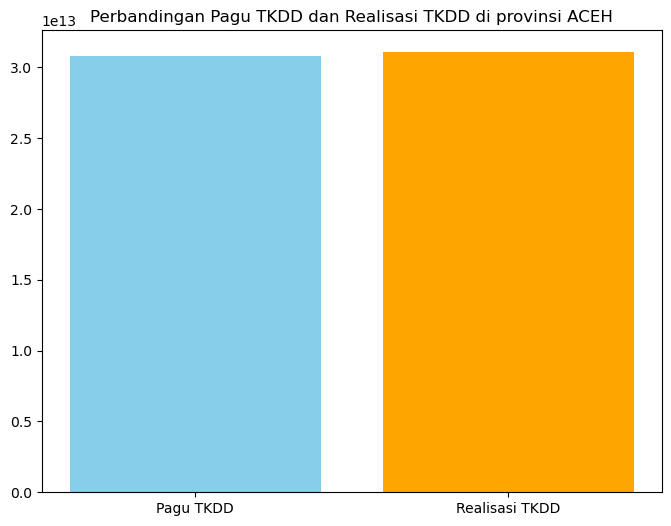

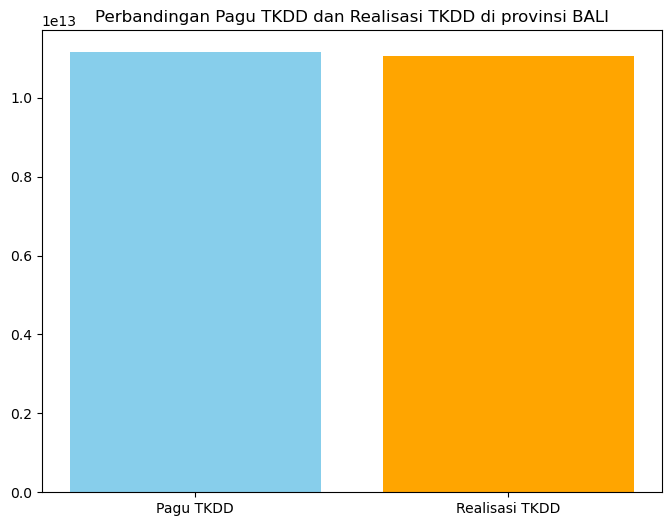

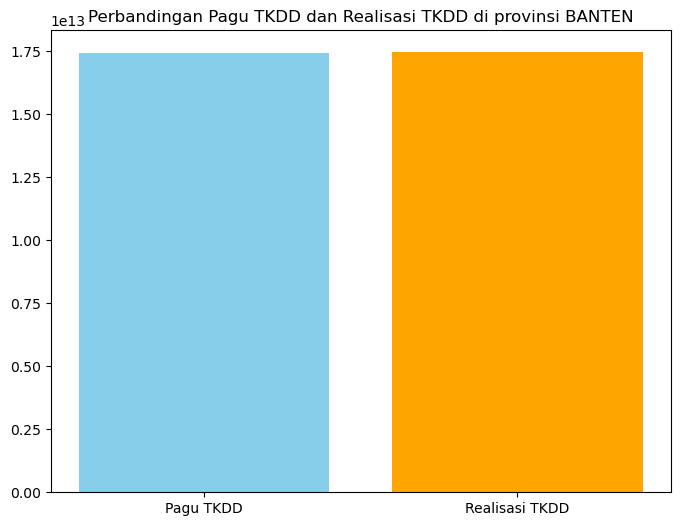

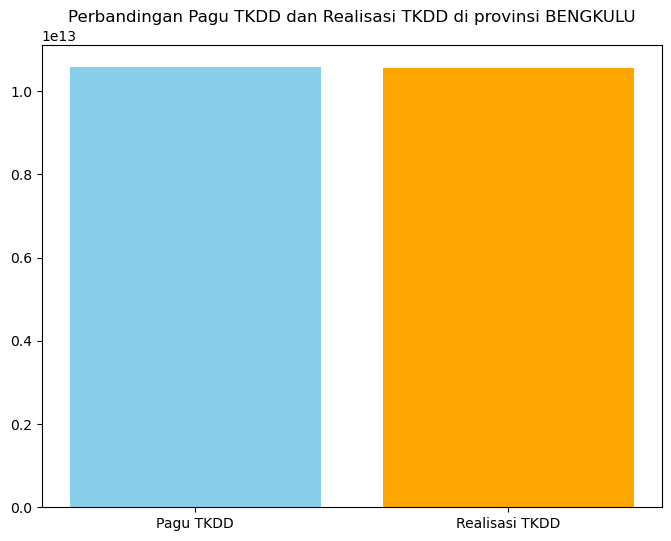

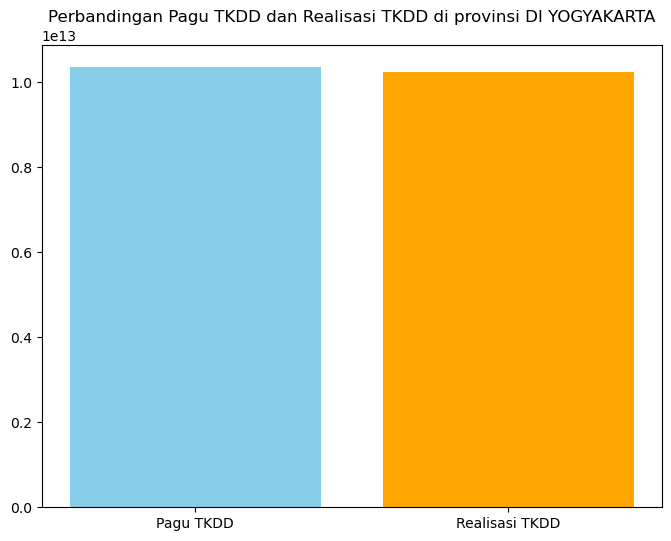

In [175]:
import matplotlib.pyplot as plt

#Visualize 5 province with their respective pagu and realization

for idx, data in df_new.head(5).iterrows():
    if not pd.isna(data['Pagu TKDD_clean']) and not pd.isna(data['Realisasi TKDD_clean']):
        plt.figure(figsize=[8, 6])
        plt.bar(['Pagu TKDD', 'Realisasi TKDD'], [data['Pagu TKDD_clean'], data['Realisasi TKDD_clean']], color=['skyblue', 'orange'])
        plt.title(f'Perbandingan Pagu TKDD dan Realisasi TKDD di provinsi {data['Provinsi']}')
        plt.show()


In [176]:
def ratio(val_1, val_2):
    return (val_1 / val_2) * 100

df_new['ratio'] = df_new.apply(lambda row: ratio(row['Realisasi TKDD_clean'], row['Pagu TKDD_clean']), axis=1)

In [177]:
df_new['ratio']

0     100.821116
1      99.218713
2     100.080214
3      99.902650
4      98.893574
5     101.559790
6      99.724419
7     100.791751
8      99.593294
9      99.467255
10     99.894633
11    101.412912
12    110.589369
13    104.232468
14    110.981466
15    105.446950
16     99.422072
17    109.777012
18    100.092430
19     99.312279
20    100.717102
21     99.797387
22     99.446227
23     94.322171
24    102.734057
25     99.690657
26     94.673466
27     94.603840
28    103.793201
29    104.292799
30     99.366494
31     99.680999
32    101.003022
33    101.855354
34     93.653878
35     99.171414
36    104.630002
37    100.015775
Name: ratio, dtype: float64

In [178]:
clean = df_new.dropna()
length = len(clean)
print(length)

total = 0
cleaned = df_new['ratio'].dropna()

for val in cleaned:
    total += val

mean = total / length
print(mean)

38
100.9121634094978


In [179]:
class_1 = []
class_2 = []
class_3 = []

for name, ratio in zip(df_new['Provinsi'], df_new['ratio']):
    if ratio < 90:
        class_1.append(name)
    elif ratio >= 90 and ratio < 100:
        class_2.append(name)
    else:
        class_3.append(name)

print(f'Provinsi yang memiliki ratio TKKD kurang dari 90% adalah: ')
for name in class_1:
    print(name)
print()
print(f'Provinsi yang memiliki ratio TKKD 90% - 100% adalah: ')
for name in class_2:
    print(name)   
print()
print(f'Provinsi yang memiliki ratio TKKD lebih dari 100% adalah: ')
for name in class_3:
    print(name)   

Provinsi yang memiliki ratio TKKD kurang dari 90% adalah: 

Provinsi yang memiliki ratio TKKD 90% - 100% adalah: 
BALI
BENGKULU
DI YOGYAKARTA
GORONTALO
JAWA BARAT
JAWA TENGAH
JAWA TIMUR
KEP. BANGKA BELITUNG
MALUKU
NUSA TENGGARA BARAT
NUSA TENGGARA TIMUR
PAPUA
PAPUA BARAT DAYA
PAPUA PEGUNUNGAN
PAPUA SELATAN
SULAWESI BARAT
SULAWESI SELATAN
SULAWESI UTARA
SUMATERA BARAT

Provinsi yang memiliki ratio TKKD lebih dari 100% adalah: 
ACEH
BANTEN
DKI JAKARTA
JAMBI
KALIMANTAN BARAT
KALIMANTAN SELATAN
KALIMANTAN TENGAH
KALIMANTAN TIMUR
KALIMANTAN UTARA
KEP. RIAU
LAMPUNG
MALUKU UTARA
PAPUA BARAT
PAPUA TENGAH
RIAU
SULAWESI TENGAH
SULAWESI TENGGARA
SUMATERA SELATAN
SUMATERA UTARA
